In [3]:
# 粒子群算法PSO求解无约束Rastrigin函数最小值

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  #指定默认字体
mpl.rcParams['axes.unicode_minus'] = False   #正常显示图像中的负号

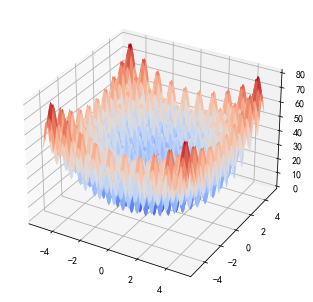

In [4]:
#Rastrigin是一个典型的非线性多峰函数，寻找全局最小值比较困难，常用来测试寻优算法的性能
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 生成X和Y的数据
X = np.arange(-5,5,0.1)
Y = np.arange(-5,5,0.1)

# 生成二维网格
X, Y = np.meshgrid(X,Y)

# 目标函数
a = 10
Z = 2*a + X**2 - a*np.cos(2*np.pi*X) + Y**2 - a*np.cos(2*np.pi*Y)

# 绘图
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)
plt.show()

In [43]:
# 由于Rastrigin函数有2个变量，现假设有n个粒子，则速度向量V和位置向量X都是n*2的矩阵

# 适应度函数
def fitness_func(X):
    a = 10
    pi = np.pi
    x = X[:,0]
    y = X[:,1]
    return 2*a + x**2 - a*np.cos(2*pi*x) + y**2 - a*np.cos(2*pi*y)

# 速度更新函数
# pbest表示每个粒子的历史最优位置，gbest表示种群历史最优位置
# w为权重，c1、c2为学习因子
def velocity_update(V,X,pbest,gbest,c1,c2,w,max_val):
    size = X.shape[0]
    r1 = np.random.random((size,1))
    r2 = np.random.random((size,1))
    V = w*V + c1*r1*(pbest-X) + c2*r2*(gbest-X)
    # 防止越界
    V[V < -max_val] = -max_val
    V[V > max_val] = max_val
    return V

#位置更新函数
def position_update(X,V):
    return X+V

# PSO主函数
def pso():
    # PSO的参数
    w = 1                 # 惯性因子，一般取1
    c1 = 2                # 学习因子，一般取2
    c2 = 2
    r1 = None 
    r2 = None
    dim = 2               # 变量的个数
    size = 20             # 种群的大小
    iter_num = 1000       # 迭代次数
    max_val = 0.5         # 限制粒子的最大速度
    
    # 初始化
    best_fitness = float(9e10)                         # 初始的适应度值
    fitness_value_list = []                            # 维护每次迭代过程中的种群适应度
    X = np.random.uniform(-5,5,size=(size,dim))        # 初始化种群各个粒子的位置
    V = np.random.uniform(-0.5,0.5,size=(size,dim))    # 初始化种群各个粒子的速度
    p_fitness = fitness_func(X)                        # 计算种群各个粒子的初始适应度
    g_fitness = p_fitness.min()                        # 计算种群的初始最优适应度值并添加到记录中
    fitness_value_list.append(g_fitness)
    
    # 初始的个体最优位置和种群最优位置
    pbest = X
    gbest = X[p_fitness.argmin()]
    
    # 迭代更新
    for i in range(1,iter_num):
        V = velocity_update(V,X,pbest,gbest,c1,c2,w,max_val)
        X = position_update(X,V)
        p_fitness2 = fitness_func(X)
        g_fitness2 = p_fitness2.min()
        # 更新每个粒子的历史最佳位置
        for j in range(size):
            if p_fitness[j] > p_fitness2[j]:
                pbest[j] = X[j]
                p_fitness[j] = p_fitness2[j]
        # 更新群体的最优位置
        if g_fitness2 < g_fitness:
            gbest = X[p_fitness2.argmin()]
            g_fitness = g_fitness2
        # 记录最优迭代结果
        fitness_value_list.append(g_fitness)

    # 输出迭代的结果
    print('最优值是：%.5f' % fitness_value_list[-1])              # 最优值是0
    print('最优解是:', gbest)                                     # 最优解是（0,0）
    
    # 可视化
    fig = plt.figure()
    plt.plot(fitness_value_list, color='r')
    plt.title('迭代过程')

最优值是：0.00002
最优解是: [-4.20203723e-05  3.01704193e-04]


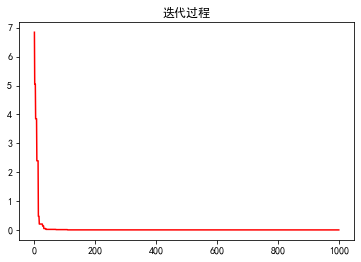

In [44]:
if __name__ == '__main__':
    pso()